In [73]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis and preprocessing

### Loading data

In [74]:
df = pd.read_csv('datasets_mushrooms.csv')


### Exploring data

In [79]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Check for null values

In [80]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [88]:
#checking for question marks
df = df.replace('?',np.NaN)
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [89]:
#we see that 2480 question marks arethere in the stalk-root. Need to replace them with 'm'
df['stalk-root'] = df['stalk-root'].replace(np.NaN, 'm')
df['stalk-root'].value_counts()

b    3776
m    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [90]:
# check unique labels in the class column
df['class'].unique()

array(['p', 'e'], dtype=object)

### Encoding catagorical data into numeric data

In [91]:
#We cannot put text data into the model so it needs to be converted into numeric data
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
    
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.354505,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.382388,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,3.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


### Splitting data into features and label

In [92]:
#From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.
#Separting features and labels

X = df.drop(['class','veil-type'], axis=1) # features
y = df['class'] #label

### Getting dummy values for X

In [93]:
#in order to avoid comparison of values within columns, we need to put them in separate columns
X = pd.get_dummies(X, columns=X.columns, drop_first = True)

### Splitting data into training and test sets

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#to estimate k-neighbors in knn
print(len(y_test))
import math
print(math.sqrt(len(y_test)))

1625
40.311288741492746


## Applying classifiers

### K-Nearest Neighbor

In [95]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate the class
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

#fit/train the model
knn.fit(X_train, y_train)

#perform prediction on the test set 
y_pred = knn.predict(X_test)

#Check accuracy
print("Accuracy with knn:", (knn.score(X_test, y_test)))

Accuracy with knn: 1.0


### Logistics Regression

In [96]:
from sklearn.linear_model import LogisticRegression

#instantiate the model using default parameteres
logreg = LogisticRegression()

#fit/train the model
logreg.fit(X_train, y_train)

#perform prediction on the test set 
y_pred = logreg.predict(X_test)

#check model accuracy
print("Accuracy with Logistic Regression:", logreg.score(X_test,y_test))


Accuracy with Logistic Regression: 1.0


**Model accuracy with confusion matrix**

Text(0.5, 257.44, 'Predicted label')

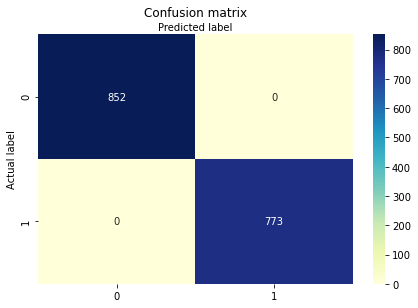

In [97]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Accuracy, Precision, Recall and F1 score**

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


### Decision Trees

In [102]:
#instantiate the Decision tree class
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion ='gini', max_depth=2, random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy with Decision tree:", clf.score(X_test, y_test))

Accuracy with Decision tree: 0.9563076923076923


### Support Vector Machine

In [103]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy with SVM:", clf.score(X_test, y_test))

Accuracy with SVM: 1.0



### Gaussian Naive Bayes

In [104]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

print("Accuracy with Gaussian Naive Bayes:", model.score(X_test, y_test))
#Predict Output

# y_pred = model.predict(X_test)


Accuracy with Gaussian Naive Bayes: 0.9513846153846154
